## Example 1.2.2.

In [12]:
# Import modules first
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import beta

In [2]:
p = np.linspace(1,0,500)
alpha, betaa = 5, 10
prior_p = beta.pdf(p, alpha, betaa)
n, y = 16, 3

alphas = [alpha + y*i for i in range(4)]
betas = [betaa + (n - y)*i for i in range(4)]
linestyles = ['-', '--', '-.',':']
colors = ['black', 'red', 'green', 'blue']
labels = ['Prior', 'Posterior 1', 'Posterior 2', 'Posterior 3']

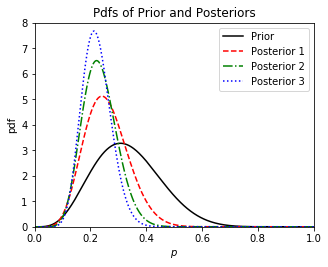

In [3]:
# Plotting

fig, ax = plt.subplots(figsize=(5, 3.75))

for a, b, ls, col, lab in zip(alphas, betas, linestyles, colors, labels):
    dist = beta(a, b)
    
    plt.plot(p, dist.pdf(p), ls=ls, c=col, label =lab)
  
    
plt.xlim(0,1)
plt.ylim(0,8) 

plt.xlabel('$p$')
plt.ylabel('pdf')
plt.title('Pdfs of Prior and Posteriors')

plt.legend()
plt.savefig('BayesianRatio102.png')
plt.show()

## Example 1.6.1.

In [97]:
np.random.seed(199)
N = 50

intercepts = [-0.06, -0.01, 0.25, 2.00]
slopes = [0.15, 0.10, 0.45, 2.85]
x = [a + b*np.random.randn(N,1) for a, b in zip(intercepts, slopes)]
epsilon = np.random.randn(N,1)
y = np.pi - 7*x[0] -1*x[1] - 15*x[2] - 2*x[3] + epsilon
X=[np.ones((N,1))]
for i in range(4):
    X.append(x[i])

In [98]:
X = np.transpose(np.asarray(X))
X.shape = (50, 5, )
y.shape = (50, )
K1 = X.shape[1]

In [99]:
# Frequentist

piF = 1/(1+np.exp(-y))
OddsF = piF/(1-piF)
betaF = np.linalg.inv(X.transpose() @ X) @ (X.transpose() @ y)

In [100]:
# Bayesian

beta0 = np.zeros((K1,))
Sigma0 = np.eye(K1)
InvSigma0 = np.linalg.inv(Sigma0)
SigmaB = np.linalg.inv(X.transpose() @ X + InvSigma0)
betaB = SigmaB @ (X.transpose() @ y + InvSigma0 @ beta0)

In [101]:
yB = []
OddsB = []

for n in range(N):
    xn = X[n,:].transpose()
    xnt = X[n,:]
    yB.append(xnt @ betaB)
    OddsB.append(np.exp(xnt @ betaB + 1/2 * xnt @ SigmaB @ xn + 1/2))

yB = np.array(yB)
OddsB = np.array(OddsB)
piB = 1/(1+np.exp(-yB.transpose()))
OddsB = OddsB.transpose()

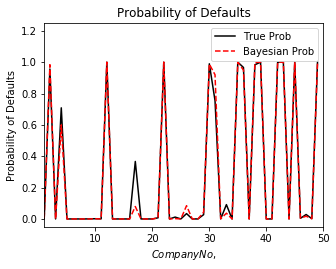

In [102]:
# Plotting

fig, ax = plt.subplots(figsize=(5, 3.75))

pis = [piF, piB]
linetypes = ['-', '--']
colors = ['black', 'red']
labels = ['True Prob', 'Bayesian Prob']

for pi, ls, col, lab in zip(pis, linetypes, colors, labels):
    plt.plot(pi, ls=ls, c=col, label =lab)
    
plt.xlim(1,N)
plt.ylim(-0.05,1.25) 

plt.xlabel('$Company No,$')
plt.ylabel('Probability of Defaults')
plt.title('Probability of Defaults')

plt.legend()
plt.savefig('DefaultProbability101.png')
plt.show()